<h2> Movie Analysis - Exploratory Data Analysis</h2>
<h5> This EDA will focus on 5 main objectives.<br>
     The end goal is to create a Hybrid-Based Filtering Model. </h5>
<ol>
<li> Initial Impressions (Data Structure/Dimension/Null Values)</li>
<li> Visualizations </li>
<li> Features Engineering & Selection</li>
<li> Model Evaluation & Validation</li>
<li> Optimization & Fine Tuning</li>
</ol>


---


<h3>1. Initial Impressions (Data Structure/Dimension/Null Values)</h3>


The goal of this segment is to go through the datasets that have been selected and get an initial impression and evaluate what tasks I may need to do in order to utilize the data.


In [12]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 0)
movieDetails_df = pd.read_csv("data/movie-details.csv")
movieRatings_df = pd.read_csv("data/movie-ratings.csv")

<hr style="border: none; border-top: 2px dotted" />
<h4> 1A. movieDetails DataFrame </h4>


In [2]:
movieDetails_df.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,False,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""name"": ""Family""}]",862,114709,en,"Led by Woody, Andy""s toys live happily in his room until Andy""s birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy""s heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033,81,Released,NaN,Toy Story,7.7,5415
1,False,65000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 10751, ""name"": ""Family""}]",8844,113497,en,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who""s been trapped inside the game for 26 years -- into their living room. Alan""s only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249,104,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413
2,False,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ""name"": ""Comedy""}]",15602,113228,en,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she""ll scare the fish away. But she""s less interested in seafood than she is in cooking up a hot time with Max.",11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0,101,Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,6.5,92
3,False,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",31357,114885,en,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156,127,Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,6.1,34
4,False,0,"[{""id"": 35, ""name"": ""Comedy""}]",11862,113041,en,"Just when George Banks has recovered from his daughter""s wedding, he receives the news that she""s pregnant ... and that George""s wife, Nina, is expecting too. He was planning on selling their home, but that""s a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911,106,Released,"Just When His World Is Back To Normal... He""s In For The Surprise Of His Life!",Father of the Bride Part II,5.7,173


In [3]:
movieDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              7493 non-null   bool   
 1   budget             7493 non-null   int64  
 2   genres             7493 non-null   object 
 3   id                 7493 non-null   int64  
 4   imdb_id            7493 non-null   int64  
 5   original_language  7493 non-null   object 
 6   overview           7485 non-null   object 
 7   popularity         7493 non-null   float64
 8   poster_path        7490 non-null   object 
 9   release_date       7493 non-null   object 
 10  revenue            7493 non-null   int64  
 11  runtime            7493 non-null   int64  
 12  status             7491 non-null   object 
 13  tagline            5780 non-null   object 
 14  title              7493 non-null   object 
 15  vote_average       7493 non-null   float64
 16  vote_count         7493 

In [4]:
movieDetails_df.isnull().sum()

adult                0   
budget               0   
genres               0   
id                   0   
imdb_id              0   
original_language    0   
overview             8   
popularity           0   
poster_path          3   
release_date         0   
revenue              0   
runtime              0   
status               2   
tagline              1713
title                0   
vote_average         0   
vote_count           0   
dtype: int64

Initial thoughts are that the data is structured about how I would expect with mainly text, int, and the genre column formatted in a JSON style.

Fortunately, there aren't too many missing values which means I can focus more of my time on evaluating the quality of the data present and what opportunities there are in terms of feature selection.


<hr style="border: none; border-top: 2px dotted" />
<h4>1B. movieRatings DataFrame</h4>


In [5]:
movieRatings_df.head()

,userId,imdb_id,rating,timestamp
0,1,112792,2.5,1260759144
1,1,33563,3.0,1260759179
2,1,117665,3.0,1260759182
3,1,82340,2.0,1260759185
4,1,95765,4.0,1260759205


In [6]:
movieRatings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99958 entries, 0 to 99957
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     99958 non-null  int64  
 1   imdb_id    99958 non-null  int64  
 2   rating     99958 non-null  float64
 3   timestamp  99958 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
movieRatings_df.isnull().sum()

userId       0
imdb_id      0
rating       0
timestamp    0
dtype: int64

Initial thoughts on this dataset is that it will work quite well for a collaborative-based filtering model. The data structure is all set up as numbers, there aren't any missing values, and the size of the data is reasonable for matrix factorization.


---

<h3>2. Visualizations </h3>


The intent here is to begin looking at distributions and see what interesting finds there are within both datasets. Doing this can lead to better feature selection/creation, along with handling potential outliers and data quality issues.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import ast

<hr style="border: none; border-top: 2px dotted" />
<h4> 2A. movieDetails DataFrame </h4>


I believe release year will have more value and better use as a feature than the exact release date. <br>
Release year can be used to filter for recency and as a method of aggregation.


In [9]:
movieDetails_df["release_year"] = pd.to_datetime(
    movieDetails_df["release_date"]
).dt.year
movieDetails_df

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,release_year
0,False,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""name"": ""Family""}]",862,114709,en,"Led by Woody, Andy""s toys live happily in his room until Andy""s birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy""s heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033,81,Released,NaN,Toy Story,7.7,5415,1995
1,False,65000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 10751, ""name"": ""Family""}]",8844,113497,en,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who""s been trapped inside the game for 26 years -- into their living room. Alan""s only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249,104,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995
2,False,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ""name"": ""Comedy""}]",15602,113228,en,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she""ll scare the fish away. But she""s less interested in seafood than she is in cooking up a hot time with Max.",11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0,101,Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,6.5,92,1995
3,False,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]",31357,114885,en,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156,127,Released,Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,6.1,34,1995
4,False,0,"[{""id"": 35, ""name"": ""Comedy""}]",11862,113041,en,"Just when George Banks has recovered from his daughter""s wedding, he receives the news that she""s pregnant ... and that George""s wife, Nina, is expecting too. He was planning on selling their home, but that""s a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own.",8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911,106,Released,"Just When His World Is Back To Normal... He""s In For The Surprise Of His Life!",Father of the Bride Part II,5.7,173,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,False,1100000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 10402, ""name"": ""Music""}]",92060,88263,en,A night at the movies turns into a nightmare when Michael and his date are attacked by a hoard of bloody-thirsty zombies.,17.856490,/puLSRxaG8MweynoRt8wZS8ZXZRM.jpg,1983-12-02,0,13,Released,NaN,"Michael Jackson""s Thriller",8.1,90,1983
7489,False,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 10769, ""name"": ""Foreign""}]",104548,165473,ja,"Gengobe Satsuma, an exiled samurai cast out as an Asano clan retainer is given a second chance to join his brothers in arms to become the 48th Ronin against the Shogunate. His faithful servant gathers the 100 ryo required for his acceptance. Gengobe is also in lov

I'll remove null values in the dataset. Since tagline contained the majority, I dropped the column and because the other fields are text fields and are <10 records, I dropped the rows for simplicity.


In [10]:
movieDetails_df_nonNull = movieDetails_df.drop(
    ["tagline", "release_date", "poster_path", "status", "id",'genres'], axis=1
).dropna(how="any", axis=0)
movieDetails_df_nonNull.isnull().sum()

adult                0
budget               0
imdb_id              0
original_language    0
overview             0
popularity           0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
release_year         0
dtype: int64

Based on the visual below, I believe it would be good to have "Net Profit" as a potential feature. This is a good method to measure the popularity of a film.

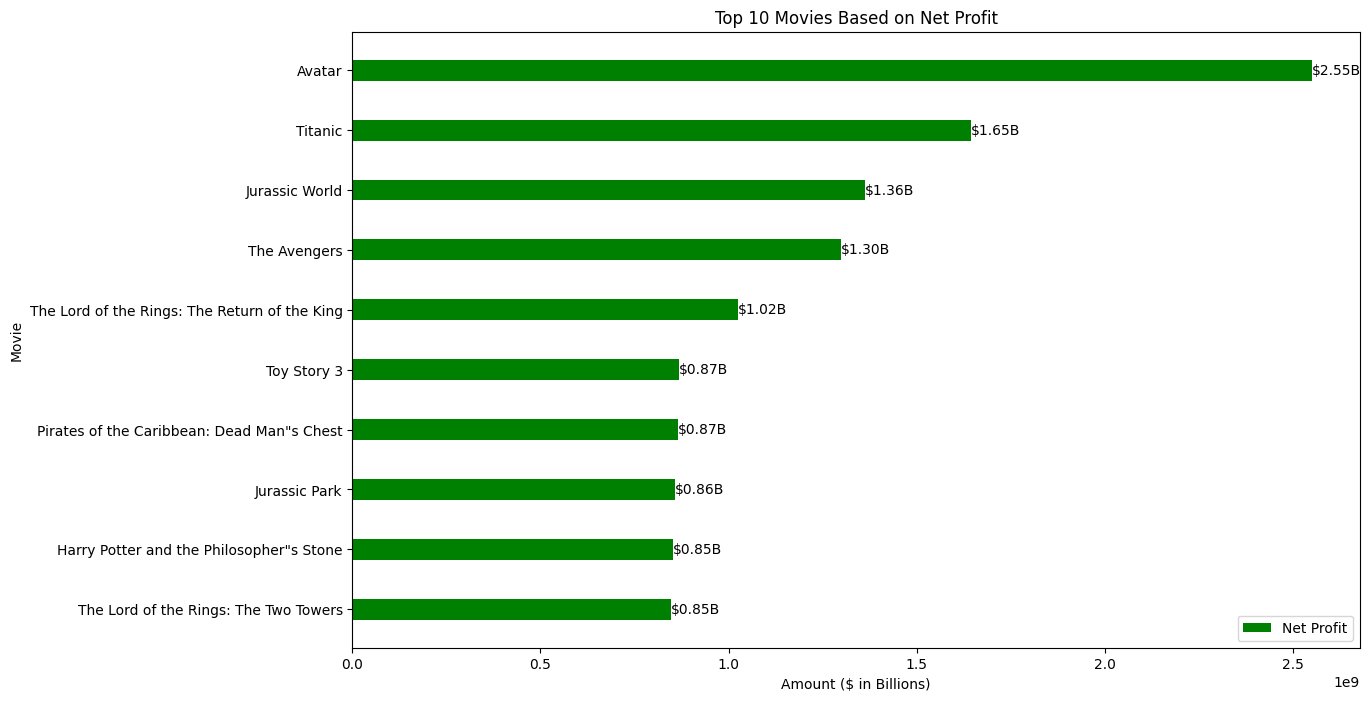

In [26]:
import numpy as np
import matplotlib.pyplot as plt

movieDetails_df_nonNull['net_profit'] = movieDetails_df_nonNull['revenue'] - movieDetails_df_nonNull['budget']

top_10_profit = movieDetails_df_nonNull.nlargest(10, 'net_profit')

bar_width = 0.35
index = np.arange(len(top_10_profit))

plt.figure(figsize=(13, 8))

bars = plt.barh(index, top_10_profit['net_profit'], bar_width, label='Net Profit')

for bar in bars:
    value = bar.get_width()
    plt.text(value, bar.get_y() + bar.get_height()/2, f'${value/1e9:.2f}B',
             va='center', ha='left', color='black')

plt.xlabel('Amount ($ in Billions)')
plt.ylabel('Movie')
plt.title('Top 10 Movies Based on Net Profit')
plt.yticks(index, top_10_profit['title'])
plt.gca().invert_yaxis()
plt.legend()

plt.show()


It looks like the dataset primarily focuses on movies from late 90's to early 2000's, but spans from 1902 to 2016 in total.

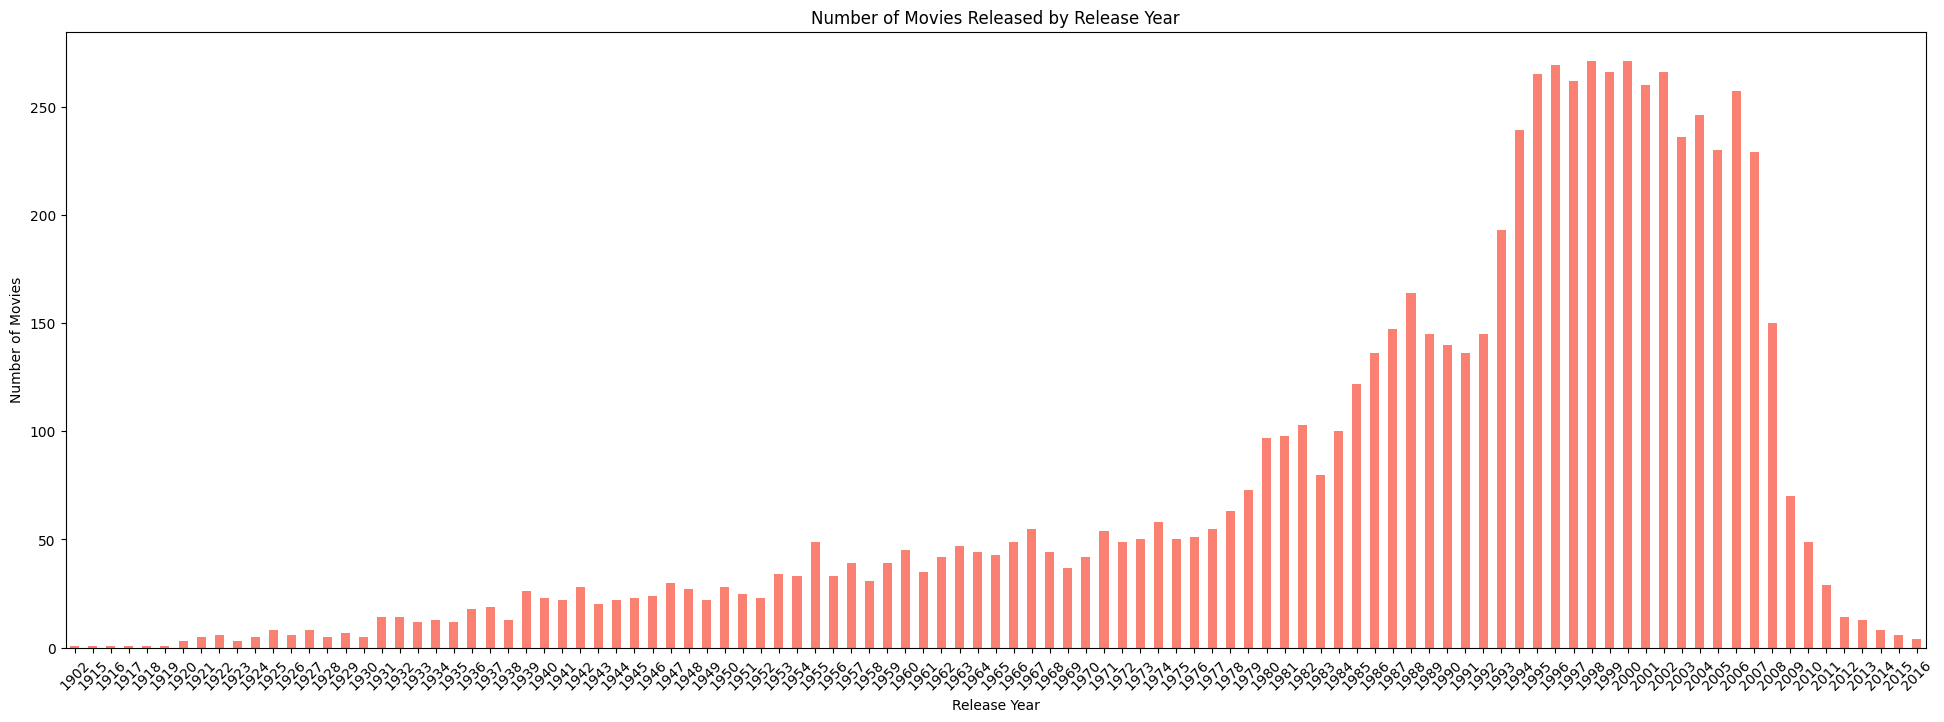

In [17]:
movies_by_year = movieDetails_df_nonNull.groupby('release_year').size()
plt.figure(figsize=(24, 8))
movies_by_year.plot(kind='bar', color='salmon')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Release Year')
plt.xticks(rotation=45)
plt.show()

I want to look at the genre column as well to see what the distribution is like and what the different genres are.

In [ ]:
movieDetails_df['genres'] = movieDetails_df['genres'].apply(lambda x: ast.literal_eval(x))
all_genres = [genre['name'] for movie_genres in movieDetails_df['genres'] for genre in movie_genres]

genre_counts = pd.Series(all_genres).value_counts().reset_index()

genre_counts.columns = ['genre', 'movie_count']


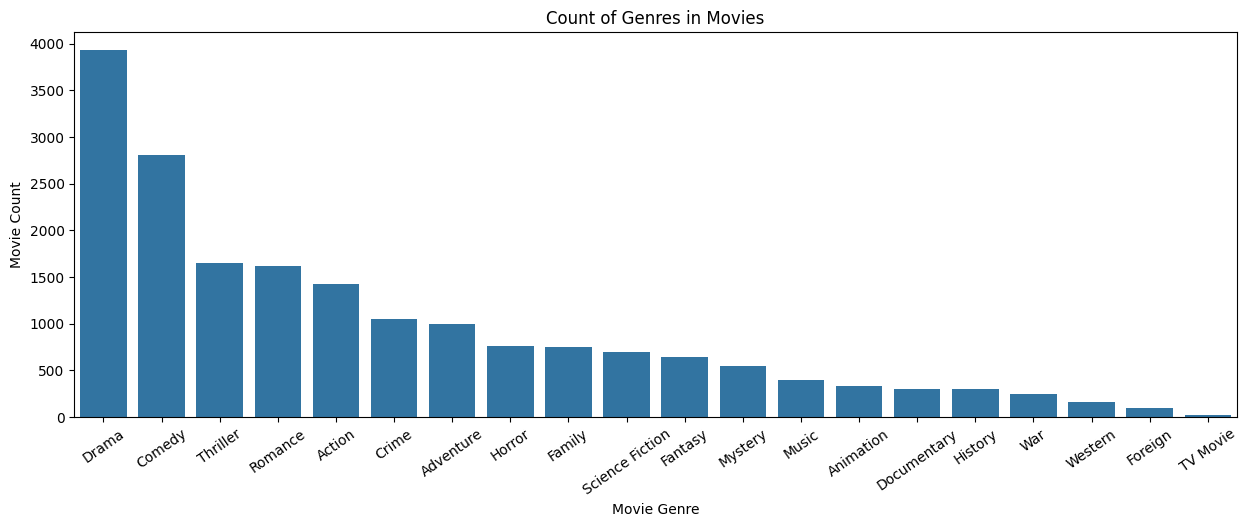

,genre,movie_count
0,Drama,3926
1,Comedy,2809
2,Thriller,1645
3,Romance,1617
4,Action,1425
5,Crime,1050
6,Adventure,1001
7,Horror,762
8,Family,751
9,Science Fiction,699


In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='genre',y='movie_count', data=genre_counts)
plt.title('Count of Genres in Movies')
plt.xlabel('Movie Genre')
plt.ylabel('Movie Count')
plt.xticks(rotation=35)
plt.show()
genre_counts

<hr style="border: none; border-top: 2px dotted" />
<h4> 2B. movieRatings DataFrame </h4>


In [28]:
movieRatings_df["date"] = pd.to_datetime(movieRatings_df["timestamp"], unit="s")

In [29]:
movieRatings_df

,userId,imdb_id,rating,timestamp,rounded_rating,date
0,1,112792,2.5,1260759144,2.0,2009-12-14 02:52:24
1,1,33563,3.0,1260759179,3.0,2009-12-14 02:52:59
2,1,117665,3.0,1260759182,3.0,2009-12-14 02:53:02
3,1,82340,2.0,1260759185,2.0,2009-12-14 02:53:05
4,1,95765,4.0,1260759205,4.0,2009-12-14 02:53:25
...,...,...,...,...,...,...
99953,671,316188,2.5,1065579370,2.0,2003-10-08 02:16:10
99954,671,334416,4.0,1065149201,4.0,2003-10-03 02:46:41
99955,671,234215,4.0,1070940363,4.0,2003-12-09 03:26:03
99956,671,298228,2.5,1070979663,2.0,2003-12-09 14:21:03


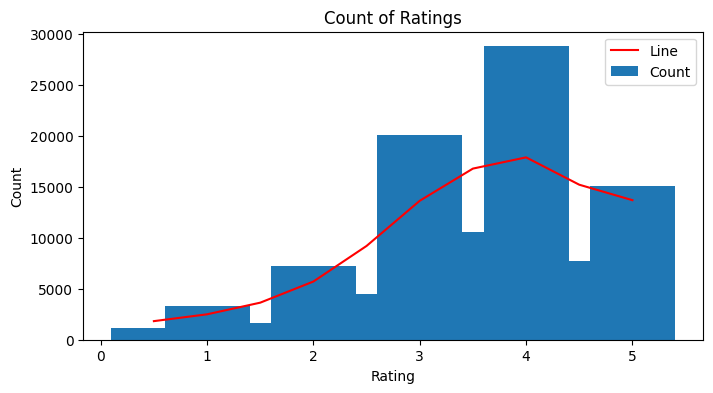

In [48]:
rating_counts = movieRatings_df["rating"].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(rating_counts.index, rating_counts.values, label="Count")

smoothed_line = gaussian_filter1d(rating_counts.values, sigma=1)
plt.plot(rating_counts.index, smoothed_line, color="r", label="Line")

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of Ratings")

plt.legend()

plt.show()

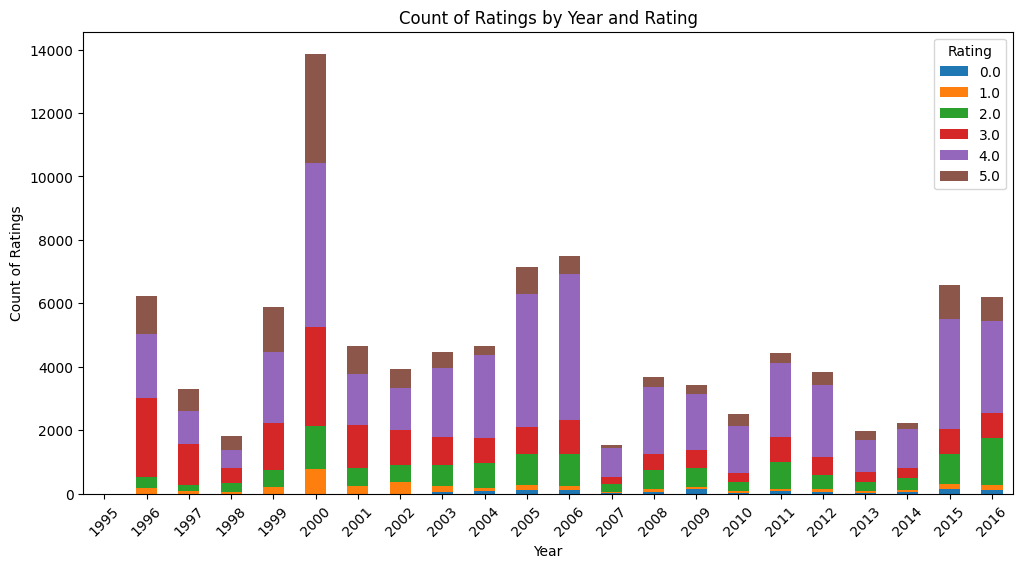

In [42]:
import matplotlib.pyplot as plt

movieRatings_df["rounded_rating"] = movieRatings_df["rating"].round()
movieRatings_df["year"] = movieRatings_df["date"].dt.year

rating_counts = (
    movieRatings_df.groupby(["year", "rounded_rating"]).size().unstack(fill_value=0)
)
rating_counts.plot(kind="bar", stacked=True, figsize=(12,6))

plt.xlabel("Year")
plt.ylabel("Count of Ratings")
plt.title("Count of Ratings by Year and Rating")
plt.xticks(rotation=45)
plt.legend(title="Rating")
plt.show()


---

<h3>3. Features Engineering & Selection </h3>


After getting a better sense of the type of information that I will be working with, this next segment will focus on what type of hybrid-system I'll be creating and the features that would prove most useful.

<h3>Hybrid-based Recommendation Approaches</h3>
<ol>
<h5><li> Feature Combination </li></h5>
    <ul> 
        <li>
            <b>How it works:</b> In this approach, features derived from both content-based and collaborative-based models are combined into a single feature space, which is then used to make recommendations. This can involve concatenating feature vectors, applying dimensionality reduction techniques, or training a joint model.
        </li><br>
        <li>
            <b>Pros:</b>
            <ul>
                <li>Allows for integration of different types of information (e.g., user preferences, item characteristics) into a unified representation. </li>
                <li>It can capture complex interactions between content-based and collaborative-based features, potentially leading to more accurate recommendations. </li>
                <li>It also provides a unified framework for feature engineering and modeling, simplifying the recommendation pipeline.</li>
            </ul>
        </li>
        <li>
            <b>Cons:</b>
            <ul>
                <li>Requires careful feature engineering to ensure compatibility and meaningful combination of features from different sources. </li>
                <li>There's complexity in model training and optimization, especially for joint models that capture interactions between features.</li>
                <li>The model may also suffer from the curse of dimensionality when dealing with high-dimensional feature spaces.</li>
            </ul>            
        </li>           
    </ul>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*K4ZRADAka8DUM3xh8H76DQ.jpeg" alt="Alternative text" />


<h5><li> Switching </li></h5>
    <ul> 
        <li>
            <b>How it works:</b> In this approach, recommendations from content-based and collaborative-based models are generated sequentially, and the final recommendation list is determined based on the output of each model. For example, if the content-based model fails to provide relevant recommendations, the collaborative-based model may be used as a fallback.
        </li><br>
        <li>
            <b>Pros:</b>
            <ul>
                <li>This approach provides a flexible mechanism for handling different recommendation scenarios and adapting to user preferences. </li>
                <li>It can mitigate the limitations of individual models by leveraging the strengths of each approach in different contexts.</li>
                <li>It offers robustness to changes in data distributions or model performance by dynamically switching between models.</li>
            </ul>           
        </li>
        <li>
            <b>Cons:</b>
            <ul>
                <li>Requires sophisticated decision-making mechanisms to determine when to switch between models and how to combine their outputs. </li>
                <li>There is an added complexity in managing multiple models and ensuring smooth transitions between them.</li>
                <li>This approach may introduce latency or overhead due to the need for sequential model evaluation and decision-making.</li>
            </ul>
        </li>
    </ul>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*oyZqArrmwxb5n-sshMzq-w.jpeg" alt="Alternative text" />
<h5><li> Weighted Hybrid Approach </li></h5>
    <ul> 
        <li>
            <b>How it works:</b> In this approach, recommendations from both content-based and collaborative-based models are combined using weighted averages or other blending techniques. Each model's recommendation is assigned a weight, which reflects its relative importance or performance.
        </li><br>
        <li>
            <b>Pros:</b>
            <ul>
                <li>It allows for flexibility in adjusting the influence of each model based on their performance or relevance to the user. </li>
                <li>The model can potentially provide more accurate recommendations by leveraging the strengths of both content-based and collaborative-based filtering.</li>
                <li>This approach allows for easy experimentation with different weightings to optimize recommendation quality.</li>
            </ul>
        </li>
        <li>
            <b>Cons:</b>
            <ul>
                <li>Requires careful tuning of weights to balance the contributions of each model effectively. </li>
                <li>It may be sensitive to changes in data distributions or model performance over time.</li>
                <li>There's added complexity in determining optimal weights, especially in large-scale recommendation systems.</li>
            </ul>                       
        </li>
    </ul>
</ol>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*N9TO6n2tlo1sN8GhsB-tqw.jpeg" alt="Alternative text" />

<hr style="border: none; border-top: 2px dotted" />
<h4> 3A. movieDetails DataFrame </h4>


<hr style="border: none; border-top: 2px dotted" />
<h4> 3B. movieRatings DataFrame </h4>